In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
matplotlib.rcParams['figure.dpi'] = 150

import matplotlib.pyplot as plt
matplotlib.rcParams.update({'figure.autolayout': True})

import seaborn as sns
sns.set(style='whitegrid', font_scale=0.9, rc={"lines.linewidth": 1.4,
                                           'lines.markersize': 1.6}, font="serif")

# import jtplot module in notebook
#from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
#jtplot.style(theme='oceans16')

# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
#jtplot.style(context='notebook', fscale=1, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size

/Users/sophia/.local/venv/maszcal/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  


# Todo: the plots showing the delta sigma don't use the right cosmology

In [3]:
import numpy as np
import maszcal.lensing
from maszcal.data.sims import NBatta2010

In [4]:
ls ../data/NBatta2010/single-mass-bin-fits/

bary-cm_2020-05-19-121452.header.txt
bary-cm_2020-05-19-121452.npy
bary-cm_fixed-true-mass_2020-05-19-133304.header.txt
bary-cm_fixed-true-mass_2020-05-19-133304.npy
bary-free-c_2020-05-19-112604.header.txt
bary-free-c_2020-05-19-112604.npy
bary-free-c_fixed-true-mass_2020-05-19-125947.header.txt
bary-free-c_fixed-true-mass_2020-05-19-125947.npy
nfw-cm_2020-05-19-103323.header.txt
nfw-cm_2020-05-19-103323.npy
nfw-cm_2020-05-19-104537.header.txt
nfw-cm_2020-05-19-104537.npy
nfw-free-c_2020-05-19-102851.header.txt
nfw-free-c_2020-05-19-102851.npy
nfw-free-c_2020-05-19-104107.header.txt
nfw-free-c_2020-05-19-104107.npy
nfw-free-c_fixed-true-mass_2020-05-19-122649.header.txt
nfw-free-c_fixed-true-mass_2020-05-19-122649.npy


In [5]:
DATA_DIR = '../data/NBatta2010/single-mass-bin-fits/'
nfw_best_fits = np.load(DATA_DIR + 'nfw-free-c_fixed-true-mass_2020-05-19-122649.npy')
bary_best_fits = np.load(DATA_DIR + 'bary-free-c_fixed-true-mass_2020-05-19-125947.npy')
bary_cm_best_fits = np.load(DATA_DIR + 'bary-cm_fixed-true-mass_2020-05-19-133304.npy')

In [6]:
assert np.all(nfw_best_fits >= 0)
assert np.all(bary_best_fits >= 0)
assert np.all(bary_cm_best_fits >= 0)

In [7]:
bary_cm_best_fits.shape

(2, 100, 14)

In [8]:
nbatta_sims = NBatta2010('../data/NBatta2010/').cut_radii(0.125, 3)

In [9]:
zs = nbatta_sims.redshifts

In [10]:
bary_best_fits[:, 10, 10]

array([3.04636366, 0.0625811 , 2.83983686])

In [11]:
nfw_cs = nfw_best_fits[0, :, :]

bary_cs = bary_best_fits[0, :, :]
bary_alphas = bary_best_fits[1, :, :]
bary_betas = bary_best_fits[2, :, :]

bary_cm_alphas = bary_cm_best_fits[0, :, :]
bary_cm_betas = bary_cm_best_fits[1, :, :]

In [12]:
num_clusters = nfw_best_fits.shape[1]
noise_reduction_factor = 1/np.sqrt(num_clusters)

In [13]:
true_masses = nbatta_sims.masses.T

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


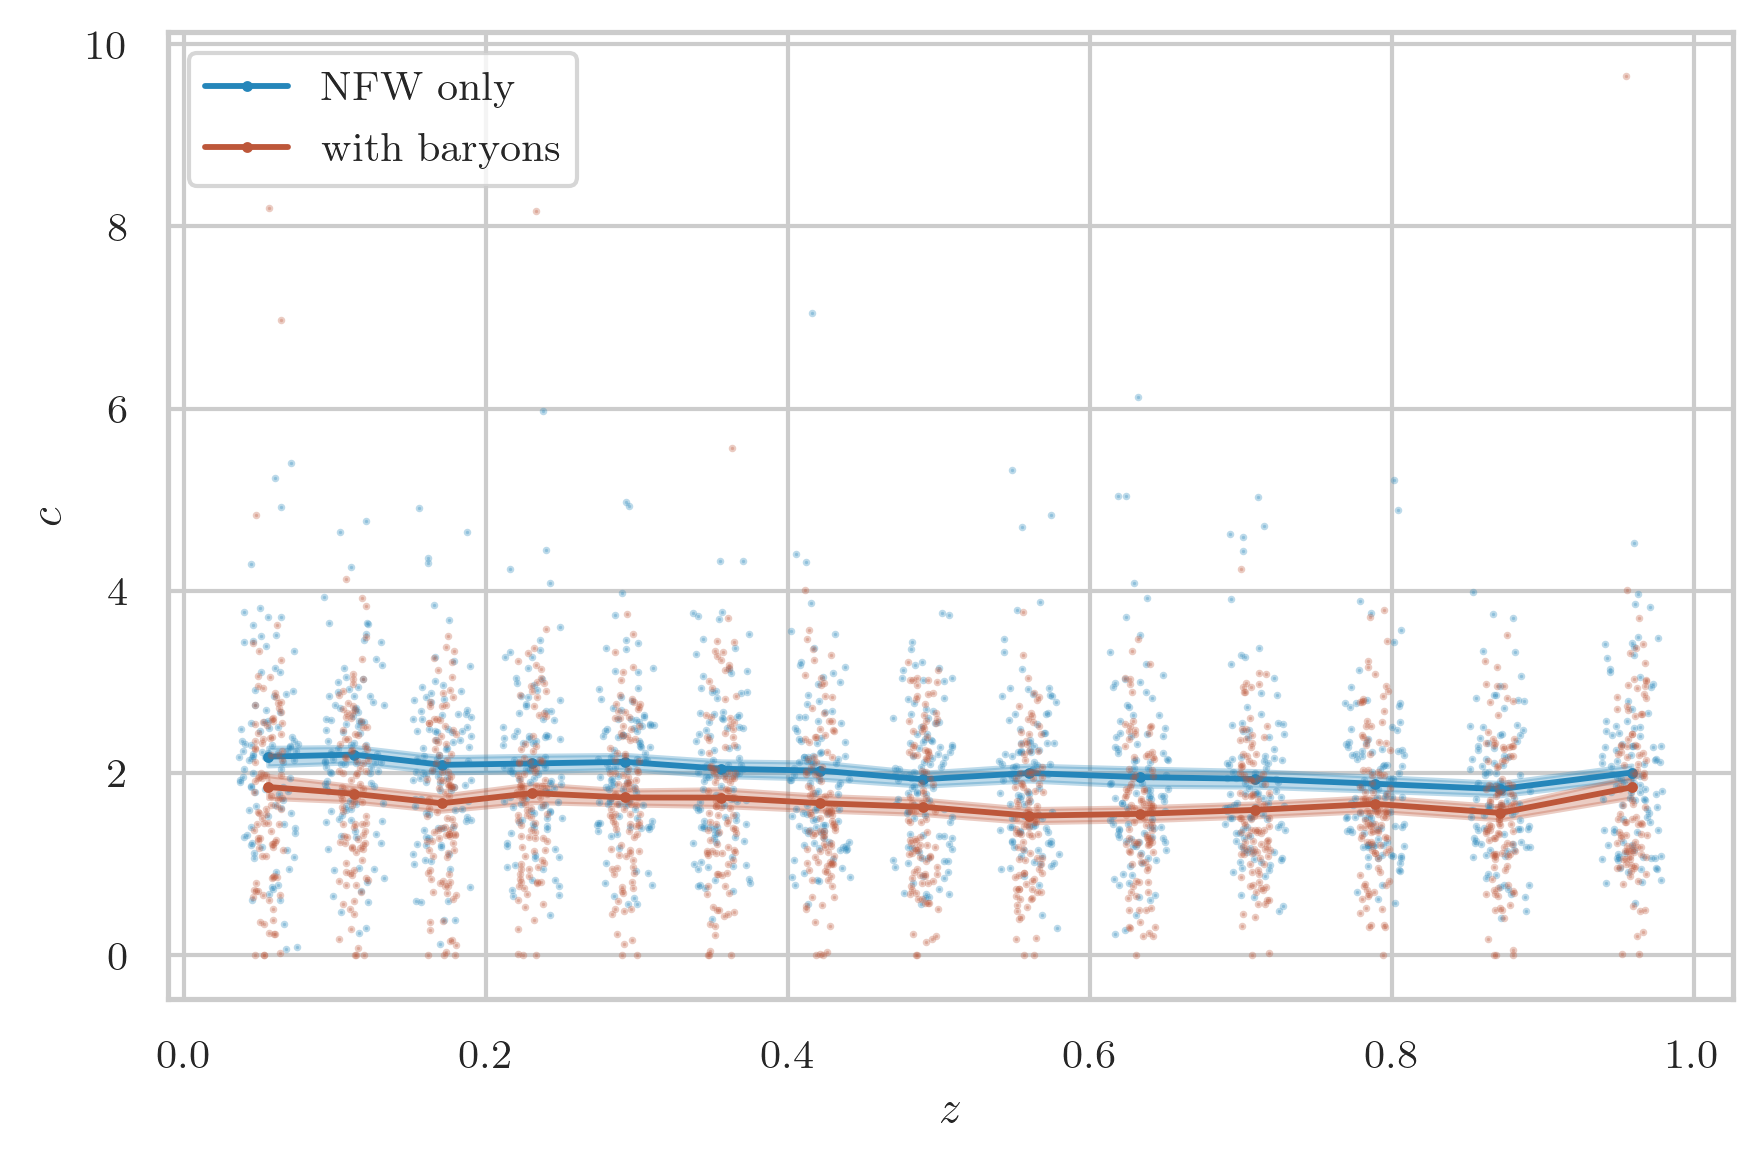

In [14]:
nfw_cs_mean = nfw_cs.mean(axis=0)
nfw_cs_std = nfw_cs.std(axis=0) * noise_reduction_factor

bary_cs_mean = bary_cs.mean(axis=0)
bary_cs_std = bary_cs.std(axis=0) * noise_reduction_factor

z_scatter = 0.04 * (np.random.rand(100, 14) - 1/2)
z_scatter_ = 0.02 * (np.random.rand(100, 14) - 1/2)

plt.plot(zs + z_scatter, nfw_cs, marker='.', linestyle='', color='#2586ba', alpha=0.3)
plt.plot(zs, nfw_cs_mean, color='#2586ba', marker='o', label='NFW only')
plt.fill_between(zs, nfw_cs_mean - nfw_cs_std, nfw_cs_mean + nfw_cs_std, color='#2586ba', alpha=0.3)

plt.plot(zs + z_scatter_, bary_cs, marker='.', linestyle='', color='#bd573a', alpha=0.3)
plt.plot(zs, bary_cs_mean, color='#bd573a', marker='o', label='with baryons')
plt.fill_between(zs, bary_cs_mean - bary_cs_std, bary_cs_mean + bary_cs_std, color='#bd573a', alpha=0.3)

plt.legend(loc='best')
plt.xlabel(r'$z$')
plt.ylabel(r'$c$')
pass

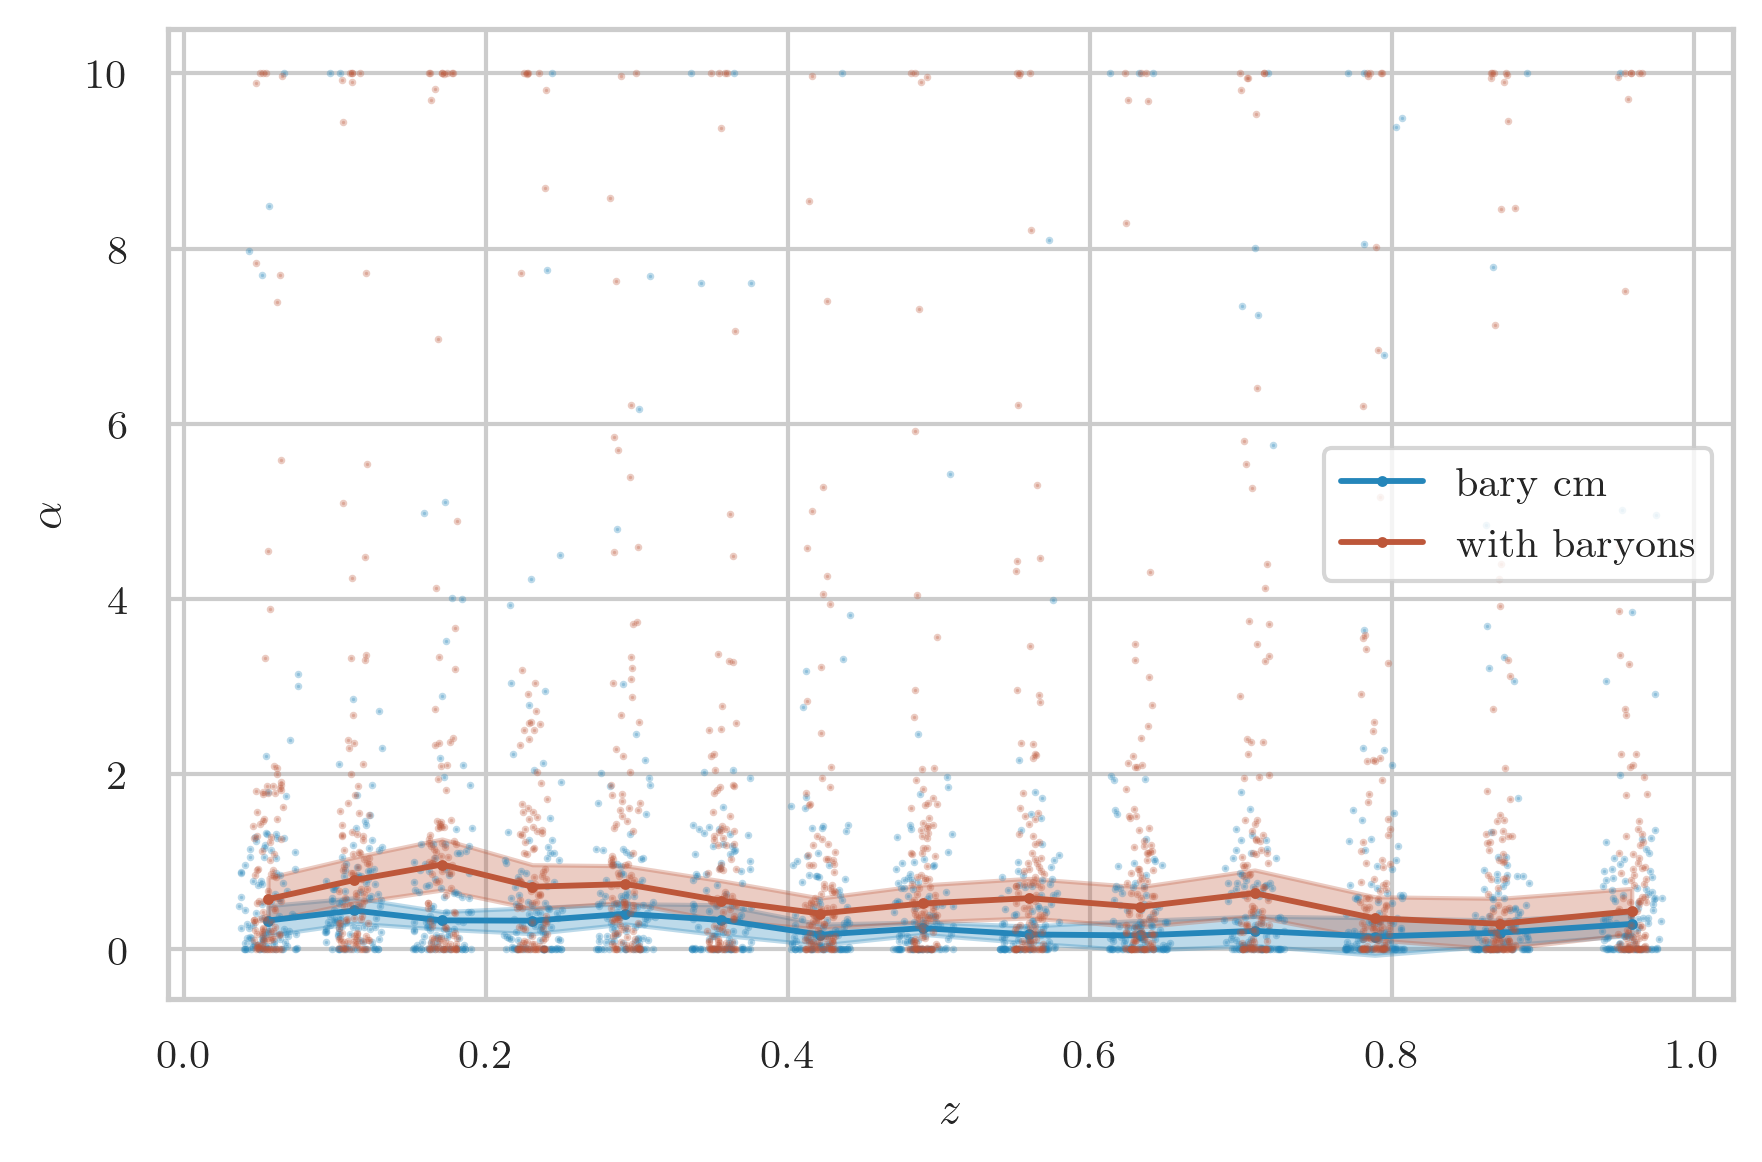

In [15]:
#bary_cm_alphas_mean = bary_cm_alphas.mean(axis=0)
bary_cm_alphas_mean = np.median(bary_cm_alphas, axis=0)
bary_cm_alphas_std = bary_cm_alphas.std(axis=0) * noise_reduction_factor

#bary_alphas_mean = bary_alphas.mean(axis=0)
bary_alphas_mean = np.median(bary_alphas, axis=0)
bary_alphas_std = bary_alphas.std(axis=0) * noise_reduction_factor

z_scatter = 0.04 * (np.random.rand(100, 14) - 1/2)
z_scatter_ = 0.02 * (np.random.rand(100, 14) - 1/2)

plt.plot(zs + z_scatter, bary_cm_alphas, marker='.', linestyle='', color='#2586ba', alpha=0.3)
plt.plot(zs, bary_cm_alphas_mean, color='#2586ba', marker='o', label='bary cm')
plt.fill_between(zs, bary_cm_alphas_mean - bary_cm_alphas_std, bary_cm_alphas_mean + bary_cm_alphas_std, color='#2586ba', alpha=0.3)

plt.plot(zs + z_scatter_, bary_alphas, marker='.', linestyle='', color='#bd573a', alpha=0.3)
plt.plot(zs, bary_alphas_mean, color='#bd573a', marker='o', label='with baryons')
plt.fill_between(zs, bary_alphas_mean - bary_alphas_std, bary_alphas_mean + bary_alphas_std, color='#bd573a', alpha=0.3)

plt.legend(loc='best')
plt.xlabel(r'$z$')
plt.ylabel(r'$\alpha$')
pass

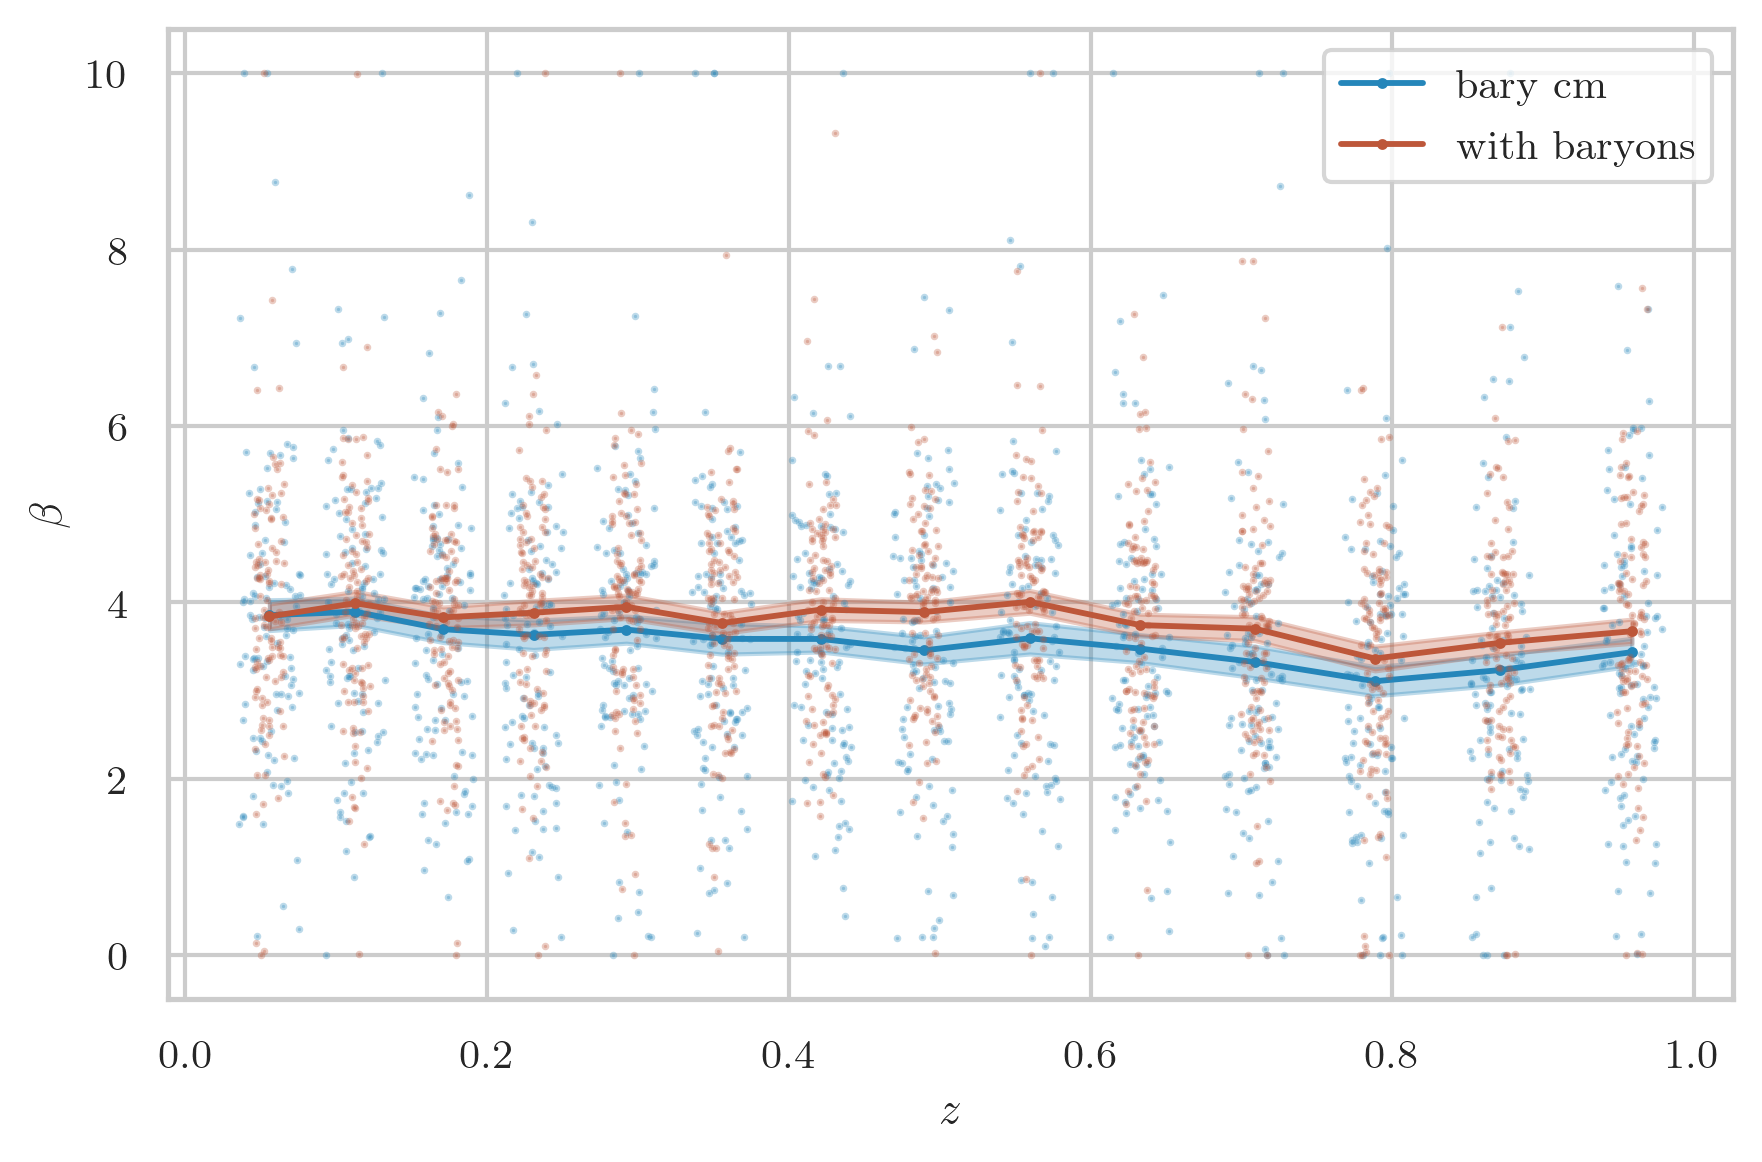

In [16]:
bary_cm_betas_mean = bary_cm_betas.mean(axis=0)
bary_cm_betas_std = bary_cm_betas.std(axis=0) * noise_reduction_factor

bary_betas_mean = bary_betas.mean(axis=0)
bary_betas_std = bary_betas.std(axis=0) * noise_reduction_factor

z_scatter = 0.04 * (np.random.rand(100, 14) - 1/2)
z_scatter_ = 0.02 * (np.random.rand(100, 14) - 1/2)

plt.plot(zs + z_scatter, bary_cm_betas, marker='.', linestyle='', color='#2586ba', alpha=0.3)
plt.plot(zs, bary_cm_betas_mean, color='#2586ba', marker='o', label='bary cm')
plt.fill_between(zs, bary_cm_betas_mean - bary_cm_betas_std, bary_cm_betas_mean + bary_cm_betas_std, color='#2586ba', alpha=0.3)

plt.plot(zs + z_scatter_, bary_betas, marker='.', linestyle='', color='#bd573a', alpha=0.3)
plt.plot(zs, bary_betas_mean, color='#bd573a', marker='o', label='with baryons')
plt.fill_between(zs, bary_betas_mean - bary_betas_std, bary_betas_mean + bary_betas_std, color='#bd573a', alpha=0.3)

plt.legend(loc='best')
plt.xlabel(r'$z$')
plt.ylabel(r'$\beta$')
pass

In [17]:
rs = nbatta_sims.radii

#z_index = 5
#cluster_index = 44

#index 15

min_indices = np.where(np.abs(nfw_bias) > 10*np.abs(cm_bias))
min_index = tuple(np.array(min_indices)[:, 6])
cluster_index = min_index[0]
z_index = min_index[1]

NameError: name 'nfw_bias' is not defined

In [52]:
nfw_model = maszcal.lensing.SingleMassNfwLensingSignal(
    redshift=np.array([zs[z_index]]),
    delta=500,
    mass_definition='crit',
)

baryon_model = maszcal.lensing.SingleBaryonLensingSignal(
    redshift=np.array([zs[z_index]]),
    delta=500,
    mass_definition='crit',
)

nfw_params = (nfw_best_fits[:, cluster_index, z_index])[None, :]
nfw_fit = nfw_model.esd(rs, nfw_params).flatten()

p = bary_best_fits[:, cluster_index, z_index]

bary_params = np.concatenate((p[:2], np.array([0.9]), p[2:], np.array([0.2])))[None, :]
bary_fit = baryon_model.esd(rs, bary_params).flatten()

true_wl = nbatta_sims.wl_signals[:, z_index, cluster_index]

In [53]:
import maszcal.concentration

con_model = maszcal.concentration.ConModel('500c', cosmology=nbatta_sims.cosmology)

In [54]:
cm_params = cm_best_fits[:, cluster_index, z_index]
mass = np.exp(cm_best_fits[0, cluster_index, z_index])
con = con_model.c(mass, np.array([zs[z_index]]), '500c').flatten()
cm_params = np.stack((cm_params, con), axis=1)
cm_fit = nfw_model.esd(rs, cm_params).flatten()

bary_cm_params = bary_cm_best_fits[:, cluster_index, z_index]
mass = np.exp(bary_cm_best_fits[0, cluster_index, z_index])
con = con_model.c(mass, np.array([zs[z_index]]), '500c').flatten()
alpha = np.array([0.9])
gamma = np.array([0.2])
bary_cm_params = np.stack(
    (bary_cm_params[:1], con, alpha, bary_cm_params[1:], gamma),
    axis=1,
)
bary_cm_fit = nfw_model.esd(rs, bary_cm_params).flatten()

In [55]:
from scipy.interpolate import interp1d


def _load_act_covariance():
    ACT_DIR = '../data/act-hsc/'
    act_rs, _, act_errs = np.loadtxt(ACT_DIR + 'deltaSigma.dat', unpack=True, skiprows=1, usecols=[0,3,4])
    full_err_cov = np.loadtxt(ACT_DIR + 'cov_lss_stacked.dat')
    con_err_cov = np.loadtxt(ACT_DIR + 'con_cov.txt')
    cov_full = (act_errs * np.identity(len(act_errs)) * act_errs) + full_err_cov + con_err_cov
    return act_rs, cov_full


def _get_cov_from_act(radii):
    act_rs, act_cov = _load_act_covariance()

    act_diag = np.diag(act_cov)

    _diag_interpolator = interp1d(act_rs, np.log(act_diag), kind='linear')
    diag_interpolator = lambda r: np.exp(_diag_interpolator(r))

    return np.diagflat(diag_interpolator(radii))


ACT_COVARIANCE = _get_cov_from_act(nbatta_sims.radii) / 100
act_r_esd_cov = np.diagflat(nbatta_sims.radii).T @ ACT_COVARIANCE @ np.diagflat(nbatta_sims.radii)
resd_errs = np.sqrt(np.diag(act_r_esd_cov))

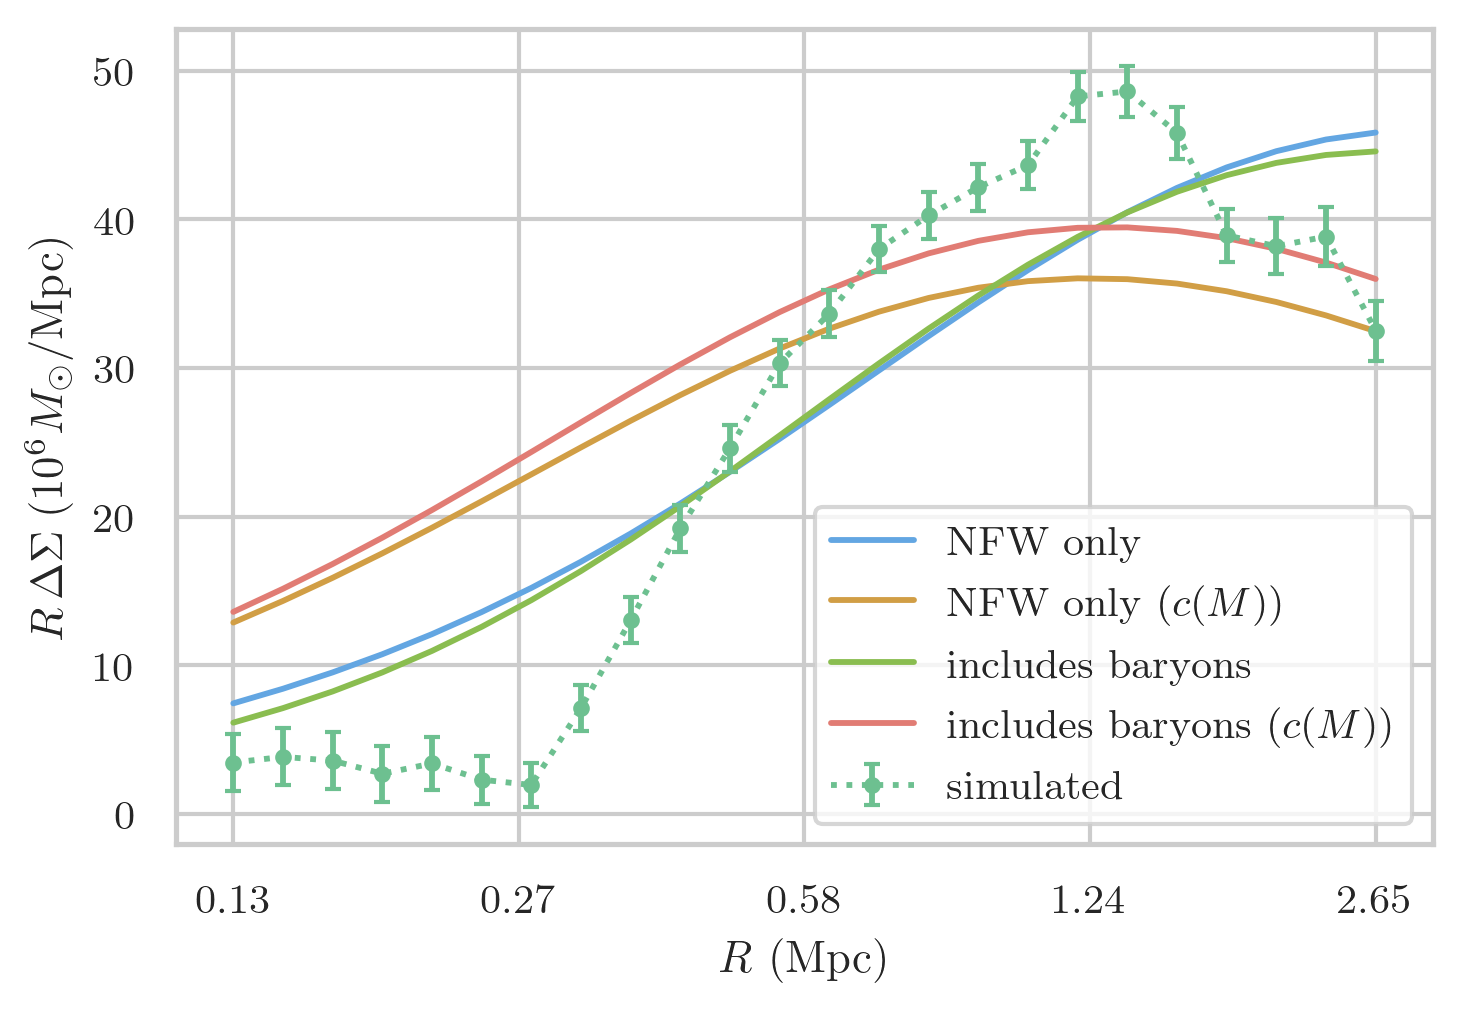

In [56]:
plt.plot(rs, rs*nfw_fit, label='NFW only', color=m_colors[1])
plt.plot(rs, rs*cm_fit, label=r'NFW only ($c(M)$)', color=m_colors[0])
plt.plot(rs, rs*bary_fit, label='includes baryons', color=m_colors[2])
plt.plot(rs, rs*bary_cm_fit, label=r'includes baryons ($c(M)$)', color=m_colors[3])

plt.errorbar(rs, rs*true_wl, yerr=resd_errs, capsize=2, zorder=3,
             marker='o', label='simulated', linestyle=':', markersize=3, color=m_colors[4])

plt.legend(loc='best')

plt.xlabel(r'$R$ (Mpc)')
plt.ylabel(r'$R \, \Delta \Sigma\; (10^6 M_\odot/$Mpc)')

plt.xscale('log')

plt.xscale('log')
plt.xticks(np.logspace(np.log10(rs[0]), np.log10(rs[-1]), 5))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.2f}')) # 2 decimal places

m_nfw = str(round(np.exp(nfw_params[0, 0])/1e14, 2))
m_cm = str(round(np.exp(cm_params[0, 0])/1e14, 2))
m_b = str(round(np.exp(bary_params[0, 0])/1e14, 2))
m_b_cm = str(round(np.exp(bary_cm_params[0, 0])/1e14, 2))
m_true = str(round(true_masses[cluster_index, z_index]/1e14, 2))

fig = plt.gcf()
fig.set_size_inches(5, 3.5)
pass


plt.savefig('../figs/sims/NBatta2010/single-mass-bin_best-fit-example_.pdf', bbox_inches='tight')

In [36]:
print('nfw: ' + m_nfw, 'cm: ' + m_cm, 'b: ' + m_b, 'b_cm: ' + m_b_cm, 'true: ' + m_true, sep='\n')

nfw: 1.79
cm: 1.45
b: 1.44
b_cm: 1.66
true: 1.47


(0, 2)